# Initial Model Creation

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

## Creation of Dataset 

In [61]:
def create_df(state, filename):
    df = pd.read_csv(filename)
    df['state'] = state
    return df
        

In [62]:
smiles = ['smile_close.csv', 'smile_1.csv', 'smile_2.csv']
neutrals = ['n_close.csv', 'neutral_1.csv', 'neutral_2.csv']
frowns = ['f_close.csv', 'frown_1.csv', 'frown_2.csv']

In [ ]:
smiles = ['s1.csv', 's2.csv', 's3.csv']
neutrals = ['n1.csv', 'n2.csv', 'n3.csv']
frowns = ['f1.csv', 'f2.csv', 'f3.csv']

In [63]:
stated_dfs = []
for smile in smiles:
    stated_dfs.append(create_df(1, "csvs/{}".format(smile)))
    

for neutral in neutrals:
    stated_dfs.append(create_df(0, "csvs/{}".format(neutral)))
    
for frown in neutrals:
    stated_dfs.append(create_df(2,"csvs/{}".format(frown)))


## Put it all together

In [64]:
all_df = pd.concat(stated_dfs)

In [65]:
all_df['state'] = all_df['state'].astype('int')
y = np.asarray(all_df['state'])
y [0:5]

array([1, 1, 1, 1, 1])

In [66]:
just_x_df = all_df.drop('state', axis = 1)

In [67]:
just_x_df.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z464,x465,y465,z465,x466,y466,z466,x467,y467,z467
0,0.545830,0.524056,-0.029297,0.546287,0.479100,-0.064522,0.546125,0.492963,-0.034046,0.537084,...,-0.005006,0.566337,0.386870,-0.013140,0.630449,0.373922,0.008083,0.636708,0.368261,0.008427
1,0.540818,0.531962,-0.026713,0.542528,0.493206,-0.062420,0.542411,0.504984,-0.032203,0.535252,...,-0.006275,0.566137,0.395106,-0.013939,0.630803,0.378139,0.006460,0.637314,0.372235,0.006693
2,0.540650,0.533919,-0.027271,0.542201,0.496070,-0.062895,0.542208,0.507744,-0.032877,0.535400,...,-0.005099,0.566600,0.398998,-0.012992,0.631385,0.383161,0.007961,0.638079,0.377253,0.008266
3,0.542104,0.531385,-0.029489,0.543360,0.492483,-0.064428,0.543156,0.505391,-0.034443,0.536507,...,-0.004299,0.567261,0.400789,-0.012429,0.631759,0.387164,0.009009,0.638496,0.381668,0.009402
4,0.542159,0.530128,-0.030081,0.543637,0.492219,-0.064291,0.543250,0.505279,-0.034784,0.536629,...,-0.003212,0.566863,0.401099,-0.011296,0.630695,0.388394,0.010466,0.637466,0.382900,0.010949


In [68]:
X = np.asarray(just_x_df)
X[0:5]

array([[ 0.55,  0.52, -0.03, ...,  0.64,  0.37,  0.01],
       [ 0.54,  0.53, -0.03, ...,  0.64,  0.37,  0.01],
       [ 0.54,  0.53, -0.03, ...,  0.64,  0.38,  0.01],
       [ 0.54,  0.53, -0.03, ...,  0.64,  0.38,  0.01],
       [ 0.54,  0.53, -0.03, ...,  0.64,  0.38,  0.01]])

In [69]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score # Accuracy metrics 
from sklearn.metrics import classification_report, confusion_matrix
import itertools


In [70]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [71]:
from sklearn.model_selection import RepeatedKFold 
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}
fit_models = {}

In [72]:
fit_models


{}

In [73]:
gb_train = {}
gb_train['pipeline'] = pipelines['gb']

In [74]:
for train_index, test_index in kf.split(X):
    print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    for algo, pipeline in gb_train.items():
        model = pipeline.fit(X_train, y_train)
        fit_models[algo] = model

Train: [   0    1    2 ... 2716 2717 2718] Validation: [   4    8   15   17   21   29   30   35   36   42   49   50   52   58
   60   64   65   68   71   74   75   82  100  104  112  114  115  116
  119  137  138  148  149  150  151  152  153  155  166  168  171  175
  177  181  192  196  199  200  217  219  223  224  230  231  232  236
  241  244  248  251  263  270  282  283  284  293  304  305  323  324
  326  333  334  338  339  348  349  352  356  359  362  377  378  383
  390  397  400  405  414  417  421  422  423  424  425  428  429  435
  436  437  439  442  453  462  465  466  467  470  471  475  487  489
  495  505  513  516  517  519  528  531  535  538  539  544  546  550
  559  567  583  585  587  588  594  602  603  618  627  638  644  649
  650  653  654  660  683  692  695  701  709  712  719  723  725  730
  745  750  756  760  763  764  766  772  774  780  783  791  795  803
  805  815  818  820  824  832  835  837  848  856  862  863  864  868
  875  883  887  889  

Train: [   0    1    2 ... 2715 2716 2717] Validation: [   7   10   12   31   32   38   39   47   56   59   70   77   86   90
   91   93   98   99  113  120  122  126  129  132  140  141  142  147
  160  178  185  186  190  195  202  205  208  212  218  221  225  227
  228  233  242  247  252  253  254  264  267  273  286  290  294  307
  309  310  313  316  325  335  336  340  344  354  363  366  372  376
  379  381  384  388  392  401  409  415  419  420  440  444  448  451
  457  483  492  494  496  497  509  510  514  521  532  545  547  552
  568  569  573  575  577  578  591  592  600  607  609  610  616  620
  641  646  652  655  656  657  658  666  671  686  687  688  689  694
  698  700  705  713  714  722  727  732  742  746  757  765  769  777
  778  779  781  785  796  797  802  817  826  833  838  841  844  845
  849  850  851  855  860  872  873  876  879  880  898  902  908  909
  910  916  917  920  921  924  925  934  936  937  939  941  946  948
  949  952  954  957  

Train: [   0    1    2 ... 2716 2717 2718] Validation: [   7    8   11   15   20   22   32   36   37   42   48   50   52   70
   72   80   88   89   91   92   98  105  108  134  141  145  147  164
  165  174  175  178  182  184  188  189  195  196  198  200  204  206
  210  214  217  222  223  225  229  231  239  246  252  258  277  280
  281  284  302  304  312  315  319  326  329  334  345  348  349  355
  366  371  375  381  382  383  395  398  409  429  432  434  438  441
  442  445  456  462  464  469  488  492  493  501  509  510  513  516
  522  527  528  530  532  538  552  563  566  571  576  577  580  583
  585  594  597  599  601  604  607  611  618  620  625  644  646  656
  657  658  665  666  670  672  677  682  688  698  699  704  707  710
  719  721  726  728  731  737  743  744  745  755  760  762  766  769
  771  788  796  797  798  805  807  809  810  811  823  827  828  830
  831  840  842  848  849  850  857  865  869  872  873  882  887  888
  894  899  903  908  

Train: [   0    1    2 ... 2713 2714 2718] Validation: [   6   18   19   27   41   44   45   56   57   58   60   62   64   65
   74   85   93   96   99  104  107  109  110  115  120  121  124  126
  128  129  135  136  146  150  157  163  166  179  180  190  191  193
  194  211  218  220  221  233  237  249  254  255  266  272  289  290
  291  296  305  310  318  332  340  341  344  346  354  362  365  367
  369  379  380  387  388  389  393  396  397  400  403  407  414  427
  450  455  460  466  468  470  472  473  476  477  480  483  487  491
  494  496  498  499  502  504  511  514  517  520  521  524  525  526
  529  536  554  568  569  579  581  590  592  595  602  610  612  617
  631  633  638  642  645  651  661  662  676  680  683  687  693  701
  709  723  732  736  752  757  773  775  785  787  790  801  822  825
  834  835  836  843  845  878  881  884  889  890  900  901  904  905
  911  917  921  922  932  934  940  945  948  950  953  958  960  961
  975  976  978  985  

Train: [   0    3    5 ... 2716 2717 2718] Validation: [   1    2    4    7   10   14   15   18   26   30   32   33   44   47
   54   55   57   60   62   63   67   69   77   80   81   88   92  100
  123  128  129  132  134  139  144  145  147  148  168  178  182  193
  200  204  208  212  215  220  228  247  249  252  254  264  278  279
  282  285  287  298  302  303  305  312  313  315  317  321  323  327
  337  339  344  354  355  360  364  365  366  367  369  371  380  381
  384  394  395  400  403  404  407  411  412  413  416  421  424  425
  430  432  440  441  455  456  462  465  466  481  485  486  487  493
  496  500  504  510  516  522  525  529  533  538  541  551  564  566
  567  572  593  605  608  609  616  625  629  630  631  634  637  650
  657  659  670  679  680  682  684  687  690  694  703  709  710  714
  724  727  737  738  739  744  764  775  783  784  786  804  805  807
  814  820  822  823  827  832  833  837  842  845  852  857  861  866
  871  872  874  876  

Train: [   0    1    2 ... 2716 2717 2718] Validation: [   4    5    6   39   48   49   50   52   76   99  101  104  115  116
  117  122  125  129  130  131  136  137  141  166  167  172  174  176
  185  186  187  193  194  199  203  204  205  219  222  225  228  230
  233  246  257  261  262  270  273  276  278  285  292  295  303  304
  306  309  314  318  324  326  327  328  335  336  347  350  357  361
  367  371  380  381  393  400  407  412  414  419  423  425  437  438
  447  450  463  466  480  481  482  494  511  512  516  525  533  539
  540  543  548  550  553  554  560  566  575  582  583  584  592  594
  603  614  615  619  623  635  643  644  646  657  660  674  679  684
  686  692  697  700  709  715  722  736  737  740  742  750  766  772
  774  777  784  793  797  800  803  805  806  808  813  816  821  829
  834  843  844  845  848  861  867  874  878  880  883  888  893  895
  898  902  909  915  924  926  944  949  951  952  954  964  969  970
  974  976  981  982  

Train: [   0    1    2 ... 2716 2717 2718] Validation: [  13   18   20   24   41   54   55   63   70   74   78   79   80   81
   83   86   90   91  113  114  127  128  133  135  138  139  142  145
  148  149  159  160  164  165  169  170  171  179  189  195  197  202
  216  220  223  224  237  242  245  251  255  258  260  284  293  296
  298  308  321  325  334  338  343  346  351  352  358  363  375  376
  377  378  387  394  397  399  401  404  410  416  418  421  422  430
  435  442  443  444  451  465  467  470  471  478  499  500  501  505
  506  519  520  524  531  532  534  537  538  541  549  551  552  555
  558  564  569  576  577  579  580  591  597  601  608  613  616  620
  626  629  631  637  638  640  647  649  654  658  661  662  671  701
  702  710  714  721  728  729  741  743  745  746  747  755  765  767
  768  781  790  794  796  811  818  819  822  826  832  836  837  840
  842  849  850  855  858  859  866  868  869  871  877  881  896  901
  904  916  917  920  

Train: [   0    1    2 ... 2714 2715 2717] Validation: [   4   15   19   21   26   27   33   34   49   52   56   63   65   66
   73   82   89  109  124  130  137  143  146  151  153  154  157  161
  162  179  180  181  185  186  189  190  200  202  203  207  216  217
  218  219  224  252  262  268  269  271  273  277  290  291  292  297
  299  301  311  314  316  323  326  327  338  352  356  360  367  373
  377  380  384  385  394  401  402  405  406  407  423  432  436  437
  439  442  443  444  448  449  454  456  457  465  467  473  484  486
  488  489  492  501  512  515  518  519  520  526  530  549  559  568
  570  574  578  582  584  585  590  591  592  598  599  612  613  614
  618  619  621  626  634  642  646  648  651  657  659  665  673  674
  680  684  686  701  704  708  713  715  717  721  743  749  755  756
  757  766  767  768  770  778  799  819  832  834  852  856  860  861
  866  885  887  892  896  897  908  922  923  927  956  965  970  971
  980  985  992  999 1

Train: [   0    1    3 ... 2715 2716 2718] Validation: [   2   13   16   18   24   32   35   50   55   61   64   69   78   83
   87   90   94   98  103  107  113  115  118  121  123  125  127  128
  131  133  145  149  159  160  183  184  201  205  206  209  210  212
  215  221  226  229  230  232  237  255  258  263  267  270  278  279
  280  286  289  298  305  321  324  335  346  348  365  366  370  371
  383  386  387  388  391  398  400  416  419  420  434  446  447  452
  459  460  462  468  480  481  485  487  490  498  500  507  508  511
  527  536  539  554  555  563  564  566  571  577  580  581  597  600
  623  630  631  650  653  654  666  668  670  675  679  689  691  693
  699  703  705  707  719  723  724  730  731  734  735  736  745  748
  761  762  763  765  769  779  781  783  789  791  797  806  811  815
  816  821  822  826  837  838  839  846  853  855  859  863  870  876
  877  882  889  899  910  913  916  928  932  934  936  941  947  948
  950  955  960  962  

Train: [   0    1    3 ... 2715 2716 2717] Validation: [   2    4   13   14   20   26   30   37   40   57   59   60   67   71
   75   78   79   82   87   92   97  114  118  122  124  128  131  146
  151  154  163  171  181  182  184  188  191  197  199  200  203  206
  210  213  216  223  224  225  233  238  240  243  253  254  256  257
  277  296  298  300  304  306  308  319  320  329  334  341  349  350
  351  360  361  365  370  372  374  380  383  391  394  398  399  411
  412  416  423  429  431  432  436  443  445  449  451  479  480  482
  487  489  490  492  494  495  498  499  511  512  522  528  540  549
  553  563  566  568  569  571  573  578  581  582  584  586  594  597
  598  603  604  607  610  620  627  634  637  646  648  649  651  656
  658  661  666  668  674  685  704  711  715  716  720  724  725  726
  730  732  743  744  750  751  757  761  765  767  769  770  774  776
  795  796  798  808  809  818  820  821  833  836  838  843  858  861
  865  874  888  892  

Train: [   0    1    4 ... 2714 2716 2718] Validation: [   2    3    7   13   24   25   30   34   37   41   43   47   49   50
   52   54   73   77   82   97  107  110  111  113  118  119  121  130
  135  139  148  157  171  191  200  201  207  210  215  219  221  227
  236  237  239  243  249  250  252  259  262  265  274  285  288  302
  306  307  310  312  314  315  316  322  323  335  338  341  342  344
  353  355  361  374  377  382  390  392  396  407  409  411  414  428
  430  440  441  444  448  455  458  461  462  463  464  465  471  476
  481  489  492  496  500  502  503  506  525  531  533  537  540  544
  545  546  558  559  566  578  580  584  586  589  605  607  617  626
  627  633  639  643  655  659  660  664  672  678  682  683  687  697
  702  704  705  708  716  720  722  727  728  729  739  743  744  747
  751  753  757  762  770  771  779  780  790  794  800  801  806  811
  813  818  820  823  834  838  839  844  846  848  852  856  858  861
  865  866  872  882  

Train: [   1    2    3 ... 2716 2717 2718] Validation: [   0    8   14   23   31   38   39   59   61   62   64   65   68   70
   71   79   80   83   89   91   99  101  103  123  131  136  140  142
  143  145  149  150  161  176  179  183  184  190  192  196  204  212
  213  217  223  231  234  238  241  242  248  253  254  255  261  266
  267  268  269  271  283  286  328  329  339  340  351  357  359  363
  364  368  370  371  376  378  379  388  389  394  395  397  398  404
  410  431  432  434  436  437  442  452  456  468  470  473  495  511
  512  513  519  522  524  539  542  549  555  556  563  564  569  573
  575  577  583  587  594  604  608  618  619  628  629  631  634  636
  641  651  665  667  673  676  681  690  706  709  710  715  731  732
  740  742  748  752  758  759  760  761  765  766  768  774  781  786
  789  792  799  808  809  824  827  830  842  843  845  855  862  863
  871  873  880  884  893  895  898  900  902  903  910  913  917  918
  925  926  934  936  

Train: [   0    1    2 ... 2716 2717 2718] Validation: [  11   15   16   17   19   33   35   39   41   42   43   44   60   61
   64   78   79   85   92   95   96  106  107  108  112  120  126  133
  134  141  142  147  149  150  153  154  163  164  170  172  181  182
  186  187  190  197  202  204  214  217  246  257  259  268  270  271
  272  273  277  281  283  284  290  291  299  300  303  311  324  326
  331  337  341  342  346  347  354  360  361  362  370  376  386  388
  390  402  409  417  424  432  445  446  452  459  463  472  474  475
  480  481  484  485  495  501  509  510  523  528  529  534  535  538
  543  552  562  565  567  578  582  585  611  613  615  621  622  631
  635  641  645  653  654  658  661  663  665  667  670  686  695  697
  698  699  709  713  720  721  727  728  729  732  744  747  749  752
  762  771  772  784  786  789  792  796  797  808  812  817  819  823
  826  827  832  837  838  849  860  864  872  874  878  880  886  890
  896  917  922  934  

Train: [   0    1    2 ... 2715 2716 2718] Validation: [   4    5   10   12   38   48   50   67   68   71   72   75   76   87
   88   90   91   97  101  110  111  117  128  137  138  145  151  156
  159  162  165  166  169  173  174  177  189  194  195  211  216  221
  224  238  243  244  249  254  255  258  261  262  264  265  269  275
  276  288  292  301  302  304  307  312  314  317  319  320  321  323
  325  328  332  335  336  348  350  352  359  367  374  377  380  387
  389  392  394  397  398  400  410  415  418  421  423  428  430  431
  436  441  450  455  469  476  477  478  483  486  499  507  514  519
  520  524  531  532  540  551  553  557  560  566  575  584  587  588
  589  593  594  602  617  624  632  637  638  650  652  657  659  666
  671  672  677  678  681  687  689  690  692  694  703  711  726  734
  737  740  757  764  765  766  769  770  779  785  788  790  799  803
  806  810  814  815  816  836  840  841  844  848  851  852  861  866
  868  873  876  885  

Train: [   0    2    3 ... 2716 2717 2718] Validation: [   1    8   10   15   17   22   23   27   34   41   48   49   54   66
   72   75   89   98  118  120  124  126  130  143  146  149  150  156
  159  164  166  169  173  175  178  181  192  198  200  201  213  217
  222  223  227  230  235  237  240  252  254  255  256  260  263  268
  272  278  279  286  288  293  294  300  304  308  310  314  315  321
  322  323  324  325  334  343  344  354  365  376  390  392  417  423
  428  438  439  441  447  451  456  472  473  474  482  488  491  495
  512  514  527  531  535  537  544  546  548  552  554  559  563  565
  571  574  579  580  585  592  595  603  616  619  620  629  630  632
  635  640  654  655  656  664  666  669  672  681  683  686  691  695
  696  697  698  702  704  714  717  720  721  729  731  737  758  760
  764  779  784  786  787  789  792  795  805  809  810  811  813  815
  828  839  841  845  848  850  851  852  856  858  866  876  899  902
  907  908  918  920  

Train: [   0    1    2 ... 2715 2716 2717] Validation: [   6    7    9   14   22   33   38   44   53   55   59   61   74   81
   85   93  105  111  117  119  121  123  125  127  135  142  151  152
  156  162  163  167  169  172  179  184  185  188  198  200  202  206
  207  213  215  217  226  229  230  242  247  248  255  263  264  265
  266  270  273  277  279  281  284  285  289  294  300  303  306  308
  319  321  322  328  332  333  342  343  346  347  354  357  363  367
  377  381  382  387  396  397  401  403  405  410  416  420  427  441
  446  455  456  462  480  482  485  488  492  495  501  509  510  518
  519  532  533  547  551  553  561  563  564  565  566  570  571  576
  580  583  584  586  588  592  594  602  604  611  617  619  620  624
  630  638  640  651  654  655  660  671  678  679  680  686  705  708
  709  710  711  713  716  719  724  727  728  733  734  737  738  739
  740  745  751  753  755  761  767  776  777  778  779  794  795  800
  805  806  808  813  

Train: [   1    2    3 ... 2716 2717 2718] Validation: [   0   11   17   20   26   28   31   32   45   46   48   50   69   70
   73   78   82   91   92   99  103  106  108  110  116  126  129  130
  133  137  143  144  150  159  160  165  166  168  177  178  180  189
  193  195  205  216  220  225  228  235  252  253  256  268  274  275
  287  295  302  304  309  312  317  324  326  331  338  340  345  349
  353  358  362  364  365  369  384  386  388  390  395  398  404  408
  414  423  424  428  438  440  442  450  452  453  460  464  468  472
  489  491  498  504  508  514  516  517  521  523  525  526  531  538
  539  540  544  548  554  555  557  558  562  581  585  589  596  605
  606  612  615  621  623  625  627  628  634  636  657  661  667  668
  670  674  676  677  683  690  691  692  699  700  702  704  725  743
  744  750  760  763  769  786  792  798  799  809  819  822  823  826
  840  845  850  851  865  866  873  875  881  883  885  889  890  894
  905  906  909  926  

In [75]:
gb = {}

gb['gb'] = fit_models['pipeline']


# lr = {}
# lr['lr'] = fit_models['lr']

# rc = {}
# rc['rc'] = fit_models['rc']

# rf = {}
# rf['rf'] = fit_models['rf']

## GB Model

gb 0.7205882352941176
              precision    recall  f1-score   support

           0       0.48      0.74      0.58       144
           1       1.00      1.00      1.00       229
           2       0.60      0.33      0.43       171

   micro avg       0.72      0.72      0.72       544
   macro avg       0.69      0.69      0.67       544
weighted avg       0.74      0.72      0.71       544

Confusion matrix, without normalization
[[106   0  38]
 [  0 229   0]
 [114   0  57]]
gb 0.6856617647058824
              precision    recall  f1-score   support

           0       0.51      0.69      0.59       178
           1       1.00      1.00      1.00       202
           2       0.47      0.29      0.36       164

   micro avg       0.69      0.69      0.69       544
   macro avg       0.66      0.66      0.65       544
weighted avg       0.68      0.69      0.67       544

Confusion matrix, without normalization
[[123   0  55]
 [  0 202   0]
 [116   0  48]]
gb 0.7224264705882353


gb 0.6740331491712708
              precision    recall  f1-score   support

           0       0.47      0.72      0.57       162
           1       1.00      1.00      1.00       199
           2       0.53      0.28      0.37       182

   micro avg       0.67      0.67      0.67       543
   macro avg       0.67      0.67      0.64       543
weighted avg       0.68      0.67      0.66       543

Confusion matrix, without normalization
[[116   0  46]
 [  0 199   0]
 [131   0  51]]
gb 0.6783088235294118
              precision    recall  f1-score   support

           0       0.50      0.70      0.58       176
           1       1.00      1.00      1.00       201
           2       0.46      0.27      0.34       167

   micro avg       0.68      0.68      0.68       544
   macro avg       0.65      0.66      0.64       544
weighted avg       0.67      0.68      0.66       544

Confusion matrix, without normalization
[[123   0  53]
 [  0 201   0]
 [122   0  45]]
gb 0.6838235294117647


c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


gb 0.7113970588235294
              precision    recall  f1-score   support

           0       0.51      0.77      0.61       161
           1       1.00      1.00      1.00       204
           2       0.61      0.33      0.43       179

   micro avg       0.71      0.71      0.71       544
   macro avg       0.71      0.70      0.68       544
weighted avg       0.73      0.71      0.70       544

Confusion matrix, without normalization
[[124   0  37]
 [  0 204   0]
 [120   0  59]]
gb 0.7113970588235294
              precision    recall  f1-score   support

           0       0.51      0.76      0.61       164
           1       1.00      1.00      1.00       219
           2       0.52      0.27      0.36       161

   micro avg       0.71      0.71      0.71       544
   macro avg       0.68      0.68      0.66       544
weighted avg       0.71      0.71      0.69       544

Confusion matrix, without normalization
[[124   0  40]
 [  0 219   0]
 [117   0  44]]
gb 0.6832412523020258


gb 0.714548802946593
              precision    recall  f1-score   support

           0       0.54      0.72      0.62       173
           1       1.00      1.00      1.00       216
           2       0.49      0.31      0.38       154

   micro avg       0.71      0.71      0.71       543
   macro avg       0.68      0.68      0.66       543
weighted avg       0.71      0.71      0.70       543

Confusion matrix, without normalization
[[125   0  48]
 [  0 216   0]
 [107   0  47]]
gb 0.6930147058823529
              precision    recall  f1-score   support

           0       0.49      0.75      0.59       160
           1       1.00      1.00      1.00       211
           2       0.53      0.27      0.36       173

   micro avg       0.69      0.69      0.69       544
   macro avg       0.67      0.67      0.65       544
weighted avg       0.70      0.69      0.67       544

Confusion matrix, without normalization
[[120   0  40]
 [  0 211   0]
 [127   0  46]]
gb 0.6746323529411765
 

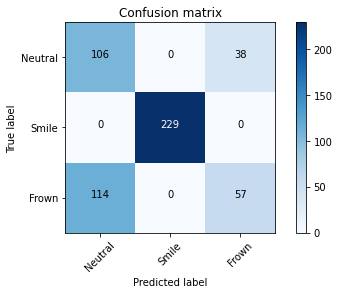

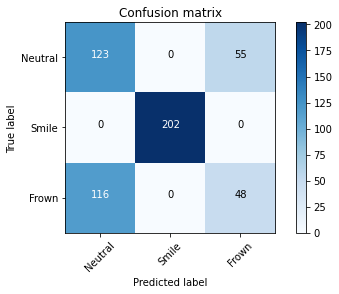

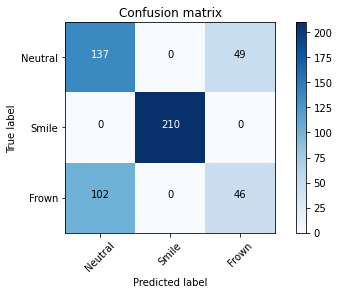

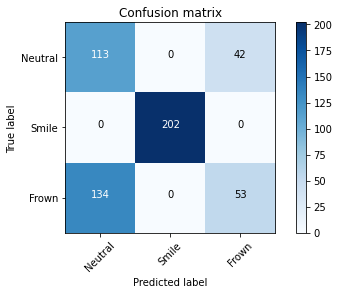

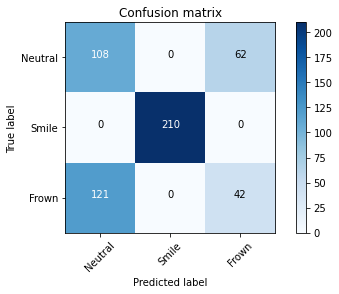

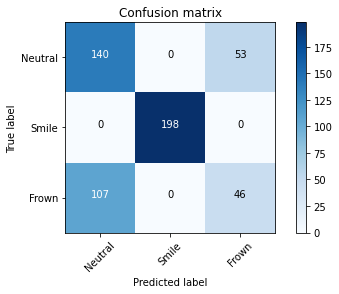

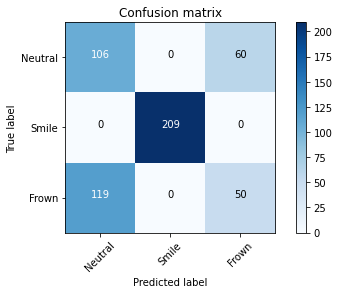

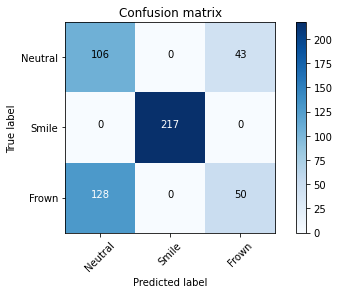

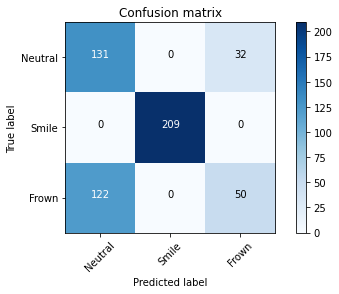

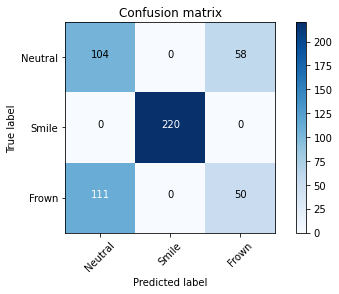

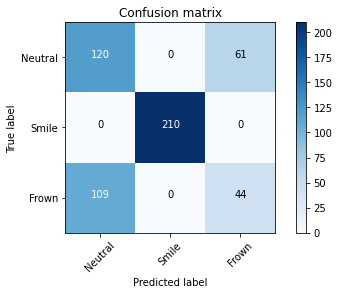

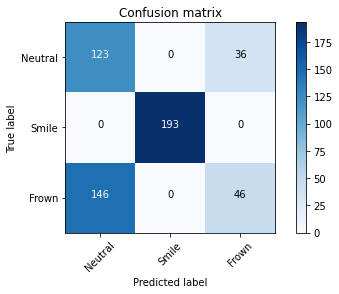

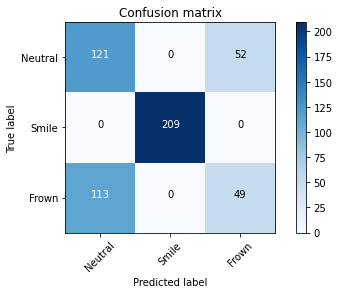

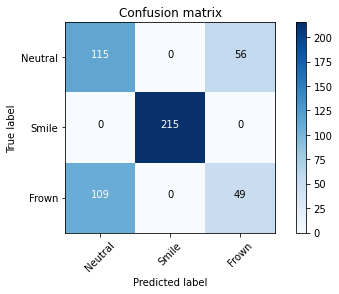

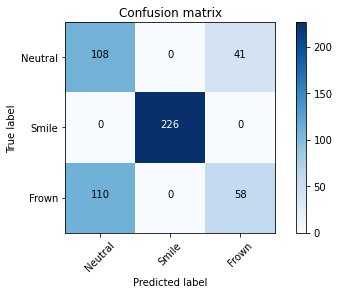

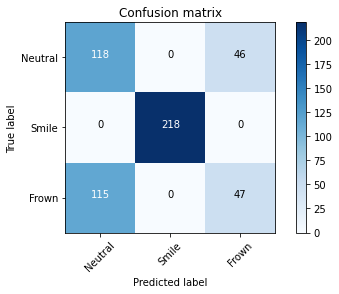

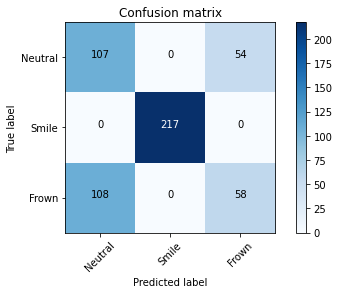

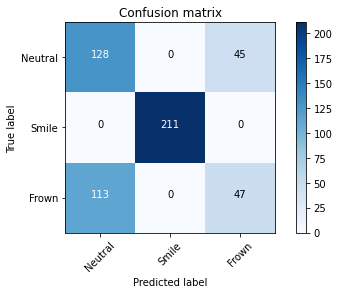

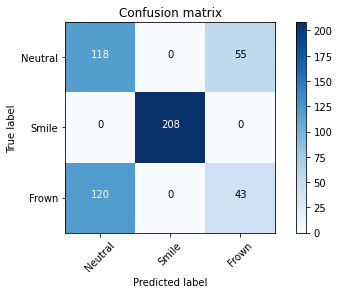

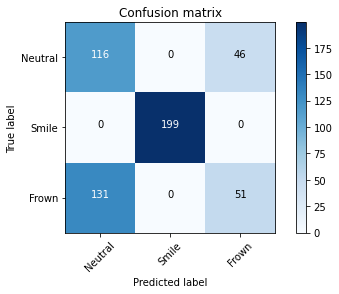

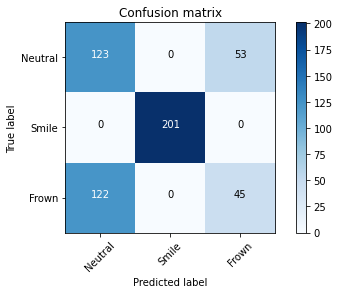

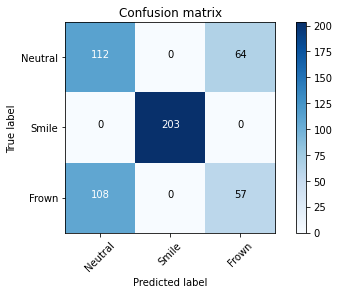

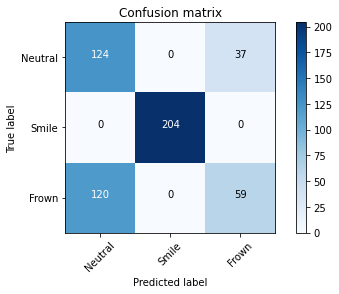

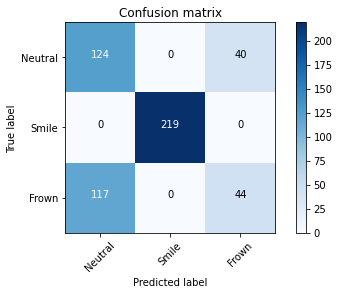

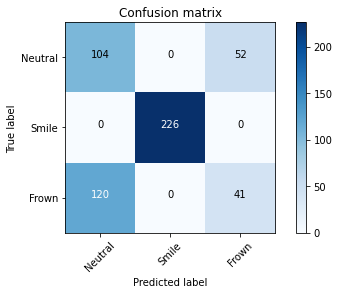

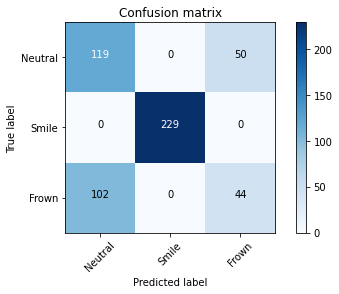

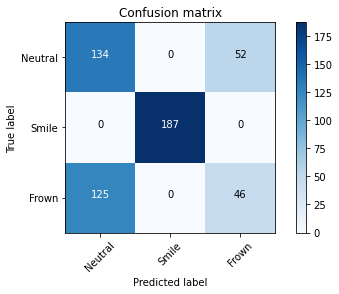

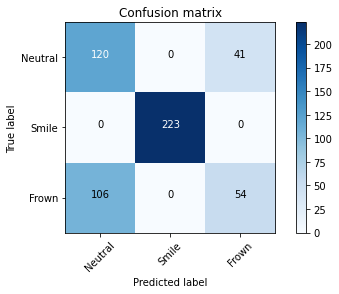

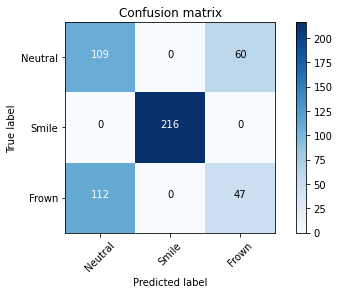

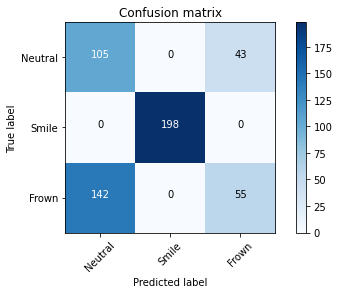

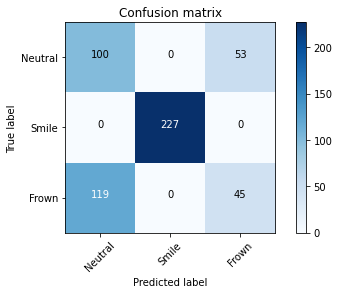

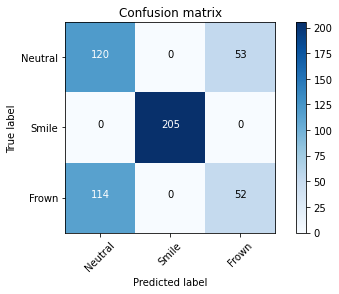

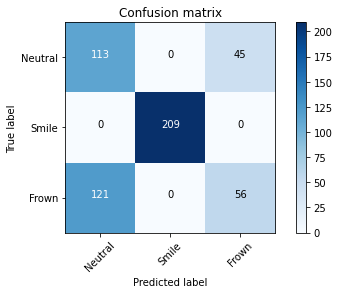

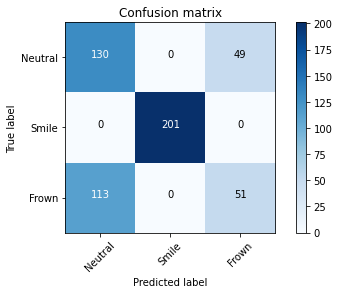

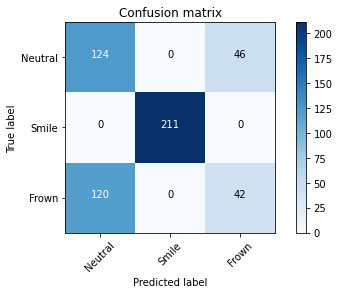

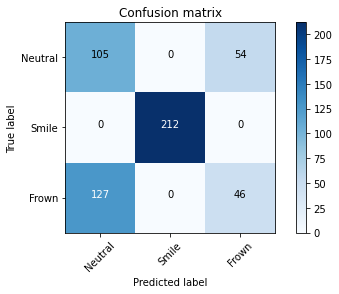

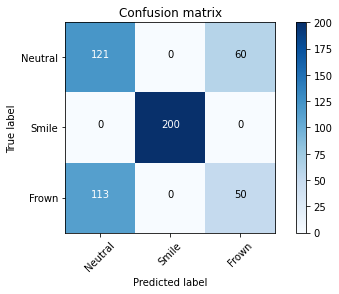

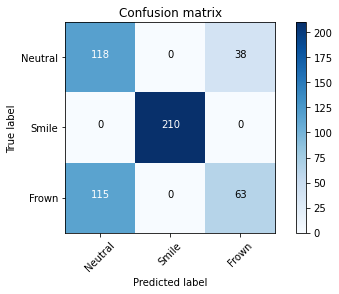

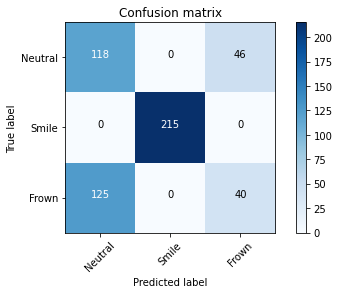

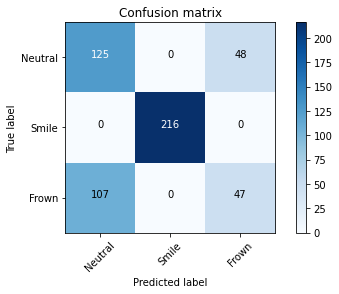

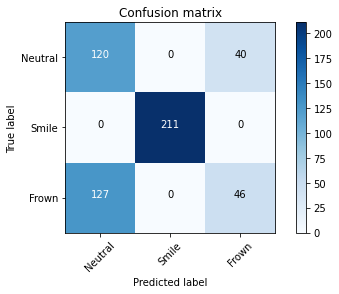

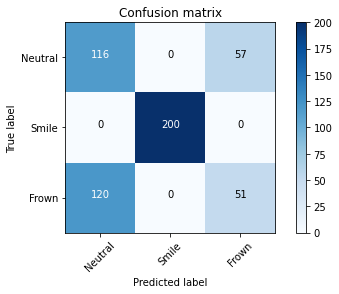

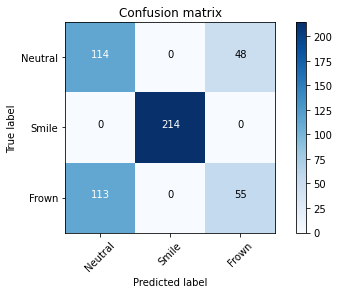

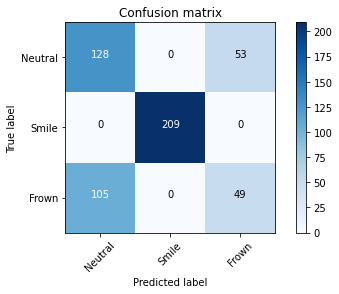

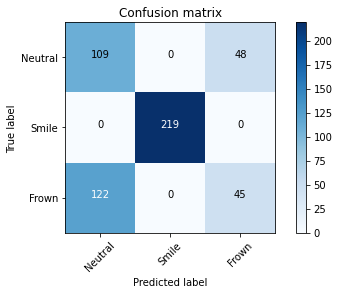

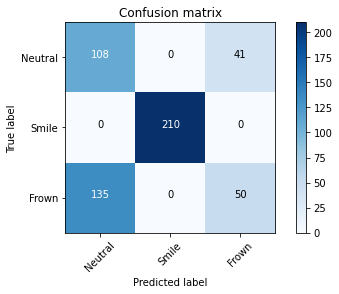

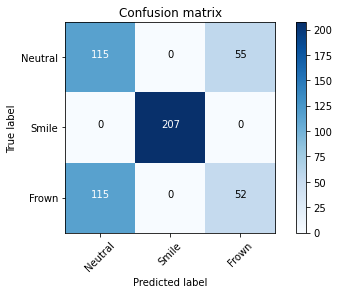

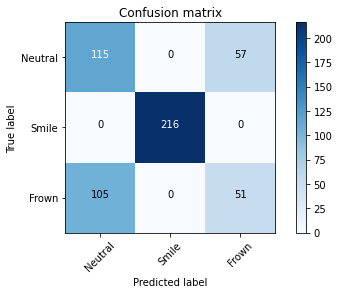

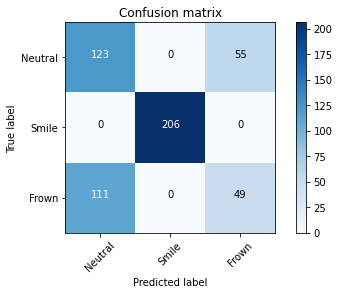

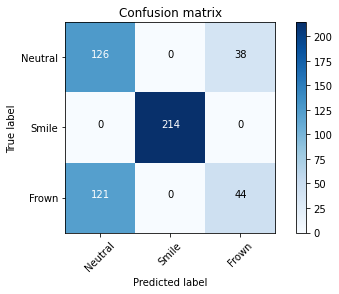

In [76]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

    for algo, model in gb.items():
        
        yhat = model.predict(X_test)
        print(algo, accuracy_score(y_test, yhat))
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2])
        np.set_printoptions(precision=2)

        print (classification_report(y_test, yhat))

        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=['Neutral','Smile', 'Frown'],normalize= False,  title='Confusion matrix')


In [80]:
import pickle
with open('smile_neutral_frown_gb_07.pkl', 'wb') as f:
    pickle.dump(gb['gb'], f)

In [3]:
import pickle
with open('smile_neutral_frown_gb_07.pkl', 'rb') as f:
    model = pickle.load(f)

In [4]:
import cv2
import mediapipe
import numpy as np
import csv
cap = cv2.VideoCapture(0)

# facemesh

faceModule = mediapipe.solutions.face_mesh
mp_drawing = mediapipe.solutions.drawing_utils # Drawing helpers

circleDrawingSpec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1, color=(0,255,0))
lineDrawingSpec = mp_drawing.DrawingSpec(thickness=1, color=(0,255,0))
 
with faceModule.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5) as face:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = face.process(image)
        #print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        if results.multi_face_landmarks != None:
            for faceLandmarks in results.multi_face_landmarks:
                point_values = []

                for i in range(0, 468):
                    pt1 = faceLandmarks.landmark[i]

                    point_values.append(pt1.x)
                    point_values.append(pt1.y)
                    point_values.append(pt1.z)
                
                
                 # Make Detections
                X = pd.DataFrame([point_values])
                body_language_class = model.predict(X)[0]
                print(body_language_class)
                
                mp_drawing.draw_landmarks(image, faceLandmarks, faceModule.FACEMESH_CONTOURS, circleDrawingSpec, lineDrawingSpec)
 

                # Display Class
                cv2.putText(image, 'CLASS'
                            , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
                cv2.putText(image, str(body_language_class)
                            , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
2
0
2
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
2
2
2
0
0
0
0
0
0
0
2
2
0
2
0
0
2
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
0
0
2
0
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
